In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('dataset/cars.csv')
data.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [3]:
data.shape

(261, 8)

In [4]:
data = data.sample(frac=1)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 6 to 255
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           261 non-null    float64
 1    cylinders    261 non-null    int64  
 2    cubicinches  261 non-null    object 
 3    hp           261 non-null    int64  
 4    weightlbs    261 non-null    object 
 5    time-to-60   261 non-null    int64  
 6    year         261 non-null    int64  
 7    brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 18.4+ KB


In [6]:
#strip extra spaces

data.columns = data.columns.str.lstrip()
data.columns

Index(['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60',
       'year', 'brand'],
      dtype='object')

In [7]:
#convert to numeric values
# errors= coerce sets invalid values to NaNs

data['cubicinches'] = pd.to_numeric(data['cubicinches'], errors= 'coerce')
data['weightlbs'] = pd.to_numeric(data['weightlbs'], errors= 'coerce')


In [8]:
data.dropna(inplace= True)
data.shape

(256, 8)

In [9]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
data['brand'] = labelEncoder.fit_transform(data['brand'].astype(str))

data.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
6,13.0,8,351.0,158,4363.0,13,1974,2
82,19.2,8,305.0,145,3425.0,13,1979,2
43,17.5,6,250.0,110,3520.0,16,1978,2
61,22.0,4,108.0,94,2379.0,17,1974,1
256,17.0,8,305.0,130,3840.0,15,1980,2


In [10]:
data_x = pd.DataFrame(data, columns= ['mpg', 'cubicinches', 'cylinders', 'hp'])
label_y = data['brand']

Text(0, 0.5, 'weights')

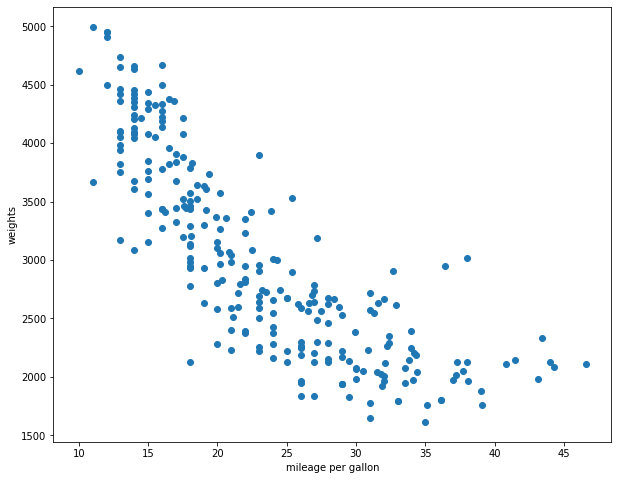

In [13]:
plt.figure(figsize = (10,8))

plt.scatter(data['mpg'], data['weightlbs'])

plt.xlabel("mileage per gallon")
plt.ylabel("weights")

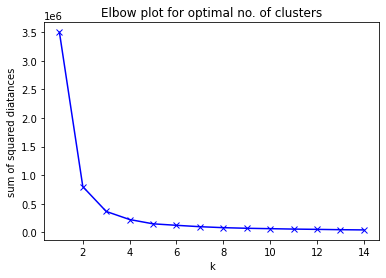

In [15]:
from sklearn.cluster import KMeans

sum_of_squared_dist = []
K = range(1,15)

for k in K:
    k_means = KMeans(n_clusters = k)
    k_means = k_means.fit(data_x)
    
    sum_of_squared_dist.append(k_means.inertia_)
    
plt.plot(K, sum_of_squared_dist, 'bx-')
plt.xlabel("k")
plt.ylabel("sum of squared diatances")

plt.title("Elbow plot for optimal no. of clusters")
plt.show()

In [16]:
k_means = KMeans(n_clusters= 3)
k_means = k_means.fit(data_x)

In [17]:
from sklearn.metrics import silhouette_score

score = silhouette_score(data_x, k_means.labels_)
print("score is ", score)

score is  0.6323149311159748


In [18]:
from sklearn.metrics import homogeneity_score

hmg_score = homogeneity_score(label_y, k_means.labels_)
print("score is ", hmg_score)

score is  0.31550036277564175


In [19]:
from sklearn.metrics import v_measure_score

vm_score = v_measure_score(label_y, k_means.labels_)
print("score is ", vm_score)

score is  0.3003375614022765


In [20]:
from sklearn.metrics import completeness_score

comp_score = completeness_score(label_y, k_means.labels_)
print("score is ", comp_score)

score is  0.28656536273532296


In [21]:
from sklearn.metrics import adjusted_rand_score

adj_r_score = adjusted_rand_score(label_y, k_means.labels_)
print("score is ", adj_r_score)

score is  0.11281925794858025


In [22]:
from sklearn.metrics import adjusted_mutual_info_score

adj_mutual = adjusted_mutual_info_score(label_y, k_means.labels_, average_method= 'arithmetic')
print("score is ", adj_mutual)

score is  0.2945981842532959
